This program uses on balance volume(OBV) to determine when to buy/sell signals. This is based on the believe that sharp increases in volume is a leading indicator for price movements. When the current OBV > OBV-EMA (bullish) and OBV < OBV-EMA (bearish).

Reference: https://www.youtube.com/watch?v=MRGXd8eaWB4&list=PLBhJnyA0V0uLLhGrJTKLNYfd7_Q-8_jja&index=27

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [34]:
# Set date as index
df = pd.read_csv('BTC-USD.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [35]:
# Calculate OBV
OBV =[]
OBV.append(0)

# Iterate through close price
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i - 1]:
        OBV.append(OBV[-1] + df.Volume[i])
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    else:
        OBV.append(OBV[-1])

In [36]:
# Store OBV and OBV Exponential Moving Average into new columns
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
df

,Date,Open,High,Low,Close,Volume,OBV,OBV_EMA
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10,0.000000e+00,0.000000e+00
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10,-1.787202e+10,-9.382811e+09
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10,-3.612105e+10,-1.920093e+10
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10,-5.247154e+10,-2.880564e+10
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10,-3.354446e+10,-2.995192e+10
...,...,...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10,1.215331e+12,1.304646e+12
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10,1.252529e+12,1.299683e+12
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10,1.290236e+12,1.298783e+12
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,3.367681e+10,1.323913e+12,1.301177e+12


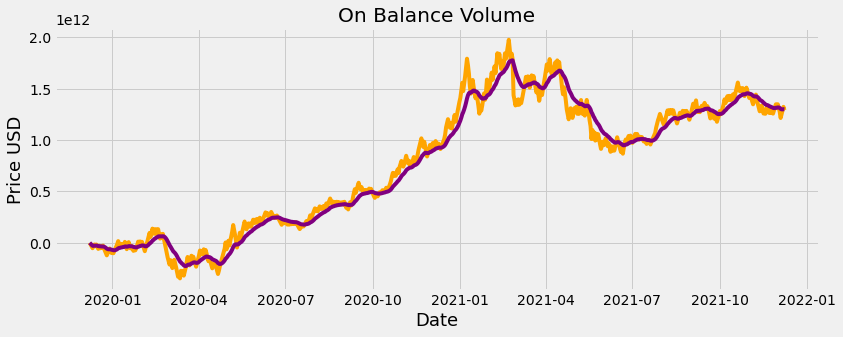

In [37]:
# Plot OBV
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['OBV'], label='OBV', color='orange')
plt.plot(df['OBV_EMA'], label='OBV_EMA', color='purple')
plt.title('On Balance Volume')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.show()

In [38]:
# buy/sell signal OBV > OBV ema (bullish), OBV < OBV ema (bearish)
df['Trend'] = np.where(df['OBV'] > df['OBV_EMA'],1 , 0)
df['Signal'] = df['Trend'].diff()

df['Buy_Signal_Price'] = np.where(df['Signal'] == 1, df['Close'], np.nan)
df['Sell_Signal_Price'] = np.where(df['Signal'] == -1, df['Close'], np.nan)
df

,Date,Open,High,Low,Close,Volume,OBV,OBV_EMA,Trend,Signal,Buy_Signal_Price,Sell_Signal_Price
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10,0.000000e+00,0.000000e+00,0,NaN,NaN,NaN
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10,-1.787202e+10,-9.382811e+09,0,0.0,NaN,NaN
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10,-3.612105e+10,-1.920093e+10,0,0.0,NaN,NaN
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10,-5.247154e+10,-2.880564e+10,0,0.0,NaN,NaN
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10,-3.354446e+10,-2.995192e+10,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10,1.215331e+12,1.304646e+12,0,0.0,NaN,NaN
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10,1.252529e+12,1.299683e+12,0,0.0,NaN,NaN
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10,1.290236e+12,1.298783e+12,0,0.0,NaN,NaN
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,3.367681e+10,1.323913e+12,1.301177e+12,1,1.0,50700.085938,NaN


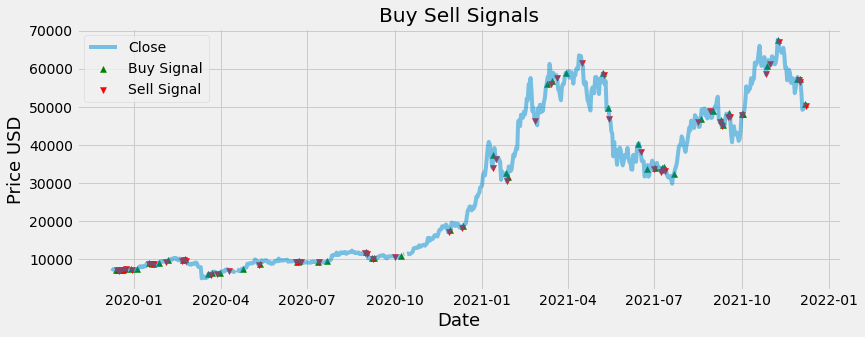

In [39]:
# Plot buy/sell price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close', alpha=0.5)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label='Sell Signal', marker='v', color='red')
plt.title('Buy Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [40]:
def tabuatePercentageGains(data):
    openPosition = False
    startingSum = 100
    quantityHeld = 0
    buyingPrice = 0
    for i in range(0, len(data.index)):
        buyPrice = data['Buy_Signal_Price'][i]
        sellPrice = data['Sell_Signal_Price'][i]
        if(not openPosition and not np.isnan(buyPrice)):
            quantityHeld = startingSum/buyPrice
            openPosition = True
            buyingPrice = buyPrice
            print(f"Buy at {buyPrice} USD")
        if(openPosition and not np.isnan(sellPrice)):
            startingSum = sellPrice * quantityHeld
            quantityHeld = 0
            openPosition = False
            print(f"Sell at {sellPrice} USD, portfolio:{startingSum}")
    
    if(openPosition):
        # Assume last open position was not taken since no selling price
        startingSum = quantityHeld * buyingPrice
        print(f"No selling price available, position at {buyingPrice} USD voided")
        
    percentageChange = startingSum - 100
    return percentageChange

percentageGained = tabuatePercentageGains(df)
print(f'Net Gain: {percentageGained}%')

Buy at 7269.68457 USD
Sell at 7124.673828 USD, portfolio:98.00526775813051
Buy at 7152.301758 USD
Sell at 6932.480469 USD, portfolio:94.99314033169954
Buy at 7276.802734 USD
Sell at 7202.844238 USD, portfolio:94.02766826298131
Buy at 7218.816406 USD
Sell at 7191.158691 USD, portfolio:93.66741662273034
Buy at 7511.588867 USD
Sell at 7355.628418 USD, portfolio:91.72263335359683
Buy at 7422.652832 USD
Sell at 7292.995117 USD, portfolio:90.12043703328129
Buy at 7410.656738 USD
Sell at 8723.786133 USD, portfolio:106.08930445522398
Buy at 8929.038086 USD
Sell at 8657.642578 USD, portfolio:102.86475099283749
Buy at 8745.894531 USD
Sell at 8680.875977 USD, portfolio:102.10003592070642
Buy at 8909.819336 USD
Sell at 9293.521484 USD, portfolio:106.49698288632695
Buy at 9729.801758 USD
Sell at 9608.475586 USD, portfolio:105.16901428177405
Buy at 9686.441406 USD
Sell at 9663.181641 USD, portfolio:104.91647504110301
Buy at 9924.515625 USD
Sell at 9650.174805 USD, portfolio:102.01629604175909
Buy at

In [41]:
# Compare to buy and hold
def buyAndHold(data):
    buyAt = data['Close'][0]
    sellAt = data['Close'][len(data.index)-1]
    return (sellAt - buyAt) * 100 / (buyAt)

performance = 100 * (percentageGained - buyAndHold(df)) / buyAndHold(df)
print(f'On Balance volume outperform buy and hold by: {np.round(performance,3)}%')

On Balance volume outperform buy and hold by: 12.188%


Closing thoughts: On Balance Volume is an excellent technical indicator producing signals that outperform the buy and old strategy.